In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from scipy.signal import savgol_filter
from matplotlib.pyplot import figure
%matpscipy.signal.residuez

UsageError: Line magic function `%matpscipy.signal.residuez` not found.


## Load data

In [18]:
data = pd.read_csv("Data/test2.txt") 
data.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0,1,2,3,4,5,6,7,8,9,...,711,712,713,714,715,716,717,718,719,720
1,8,7,2,6,3,3,2,5,9,2,0,0,5,0,6,5,10,4,23,5,5,1,11,1,10,5,2,6,2,20,2,9,16,12,5,6,5,3,12,8,12,16,22,2,8,40,4,4,1,4,16,7,6,0,7,19,7,12,5,3,3,5,4,5,7,21,8,18,6,8,4,1,0,4,13,4,2,7,7,1,7,9,5,2,0,10,2,-8,-6,...,10,0,0,3,10,-2,17,-2,-6,0


In [19]:
dataList = data.iloc[0]

## Choosing filter

In [23]:
dataList = abs(dataList[:180])

In [24]:
filteringData1 = savgol_filter(dataList,5,2)
filteringData2 = savgol_filter(dataList,7,2)
filteringData3 = savgol_filter(dataList,9,2)
filteringData4 = savgol_filter(dataList,11,2)

(-4.45, 93.45, -5.3500000000000005, 112.35)

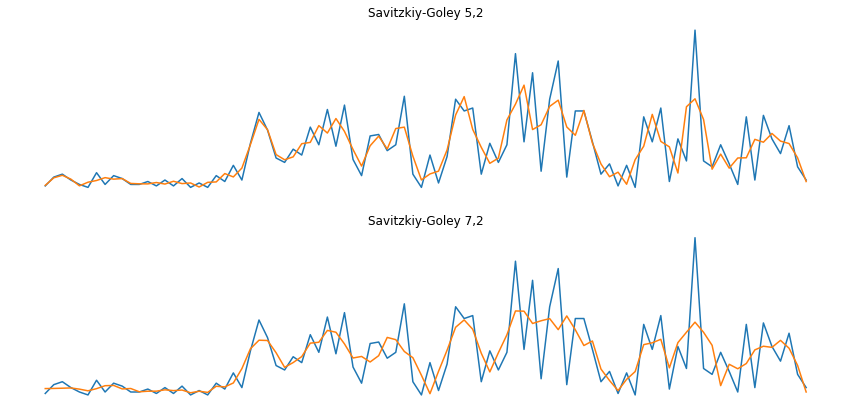

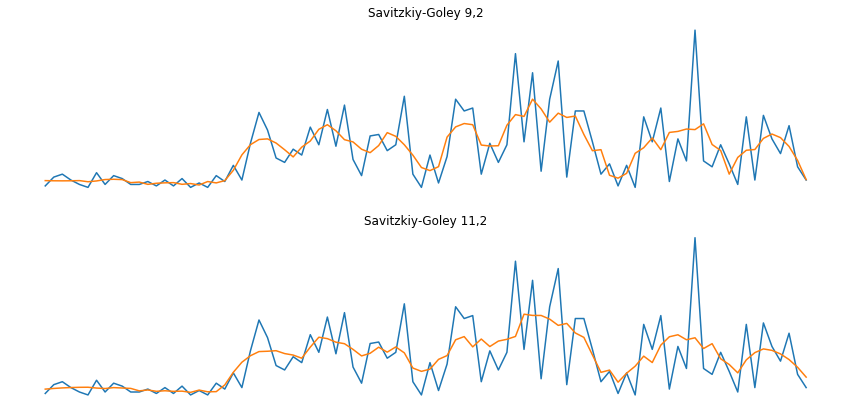

In [37]:
figure(figsize=(15, 7))

plt.subplot(2,1,1)
plt.plot(dataList)
plt.plot(filteringData1)
plt.title("Savitzkiy-Goley 5,2")
plt.axis('off')
plt.subplot(2,1,2)
plt.plot(dataList)
plt.plot(filteringData2)
plt.title("Savitzkiy-Goley 7,2")
plt.axis('off')

figure(figsize=(15, 7))

plt.subplot(2,1,1)
plt.plot(dataList)
plt.plot(filteringData3)
plt.title("Savitzkiy-Goley 9,2")
plt.axis('off')
plt.subplot(2,1,2)
plt.plot(dataList)
plt.plot(filteringData4)
plt.title("Savitzkiy-Goley 11,2")
plt.axis('off')

